In [4]:
import pandas as pd
#import pandas_profiling as pdp
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt

np.random.seed(220409)

In [3]:
#df = pd.read_csv("drive/MyDrive/Colab Notebooks/SNA.csv")
df = pd.read_csv("data/SNA.csv")
df.tail()

,Unnamed: 0,Unnamed: 1,NDI,C
107,NaN,Q4,114442.5,106077.7
108,2021.0,Q1,106817.6,98991.7
109,NaN,Q2,NaN,NaN
110,NaN,Q3,NaN,NaN
111,NaN,Q4,NaN,NaN


In [5]:
df = df.drop(df.columns[[0,1]], axis = 1).dropna()
df.tail()
#pdp.ProfileReport(df)

,NDI,C
104,106615.8,101029.3
105,98556.2,97528.8
106,99273.8,98048.2
107,114442.5,106077.7
108,106817.6,98991.7


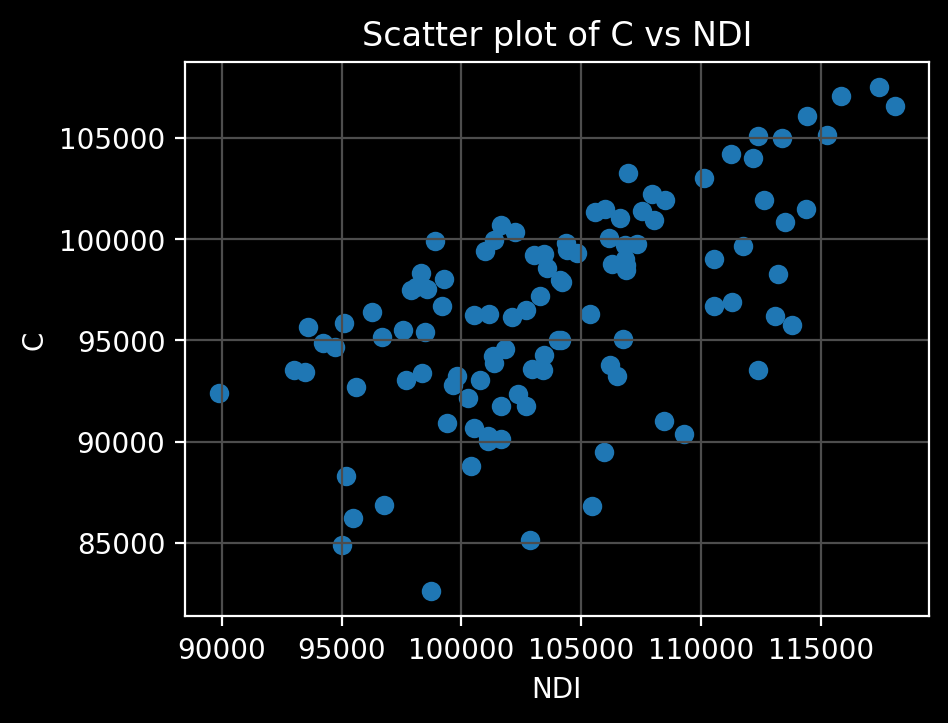

In [6]:
%matplotlib inline
plt.scatter(df[["NDI"]], df[["C"]])
plt.title("Scatter plot of C vs NDI")
plt.xlabel("NDI")
plt.ylabel("C")
plt.grid()

In [7]:
X = df[["NDI"]].values
Y = df[["C"]].values

model_ols = sm.OLS(Y, X)
fit_ols = model_ols.fit()
print(fit_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.480e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                   2.92e-143
Time:                        18:10:23   Log-Likelihood:                         -1077.2
No. Observations:                 109   AIC:                                      2156.
Df Residuals:                     108   BIC:                                      2159.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

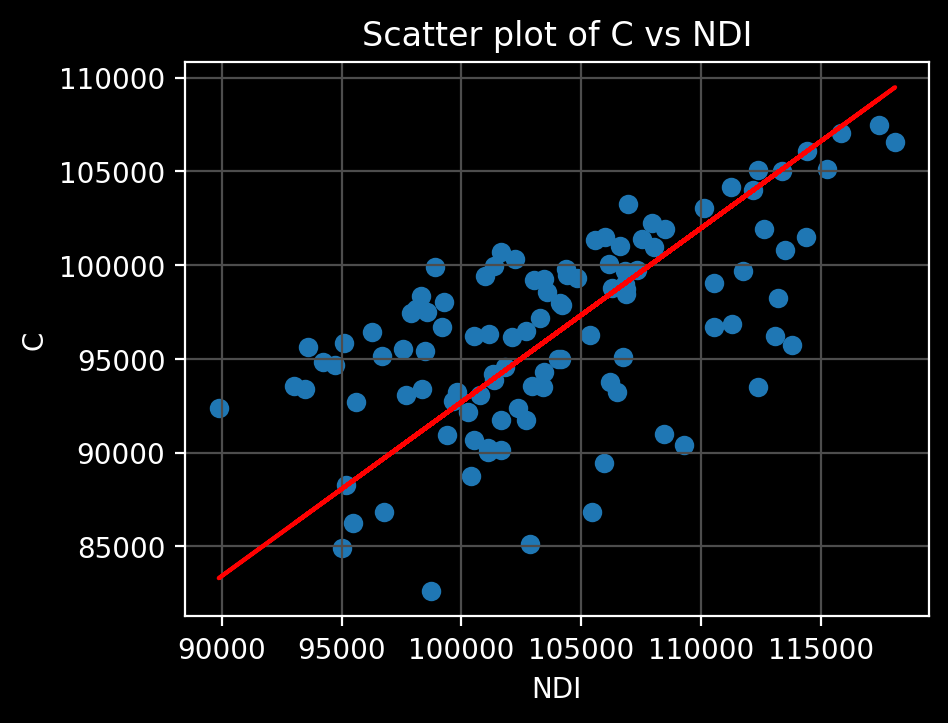

In [8]:
plt.scatter(X, Y)
plt.plot(X, fit_ols.predict(), color = "red")
plt.title("Scatter plot of C vs NDI")
plt.xlabel("NDI")
plt.ylabel("C")
plt.grid()

(array([ 7.,  2.,  4., 12., 16., 22., 18.,  8., 12.,  8.]),
 array([-10929.32510396,  -8926.71157245,  -6924.09804093,  -4921.48450942,
         -2918.8709779 ,   -916.25744639,   1086.35608513,   3088.96961664,
          5091.58314815,   7094.19667967,   9096.81021118]),
 <a list of 10 Patch objects>)

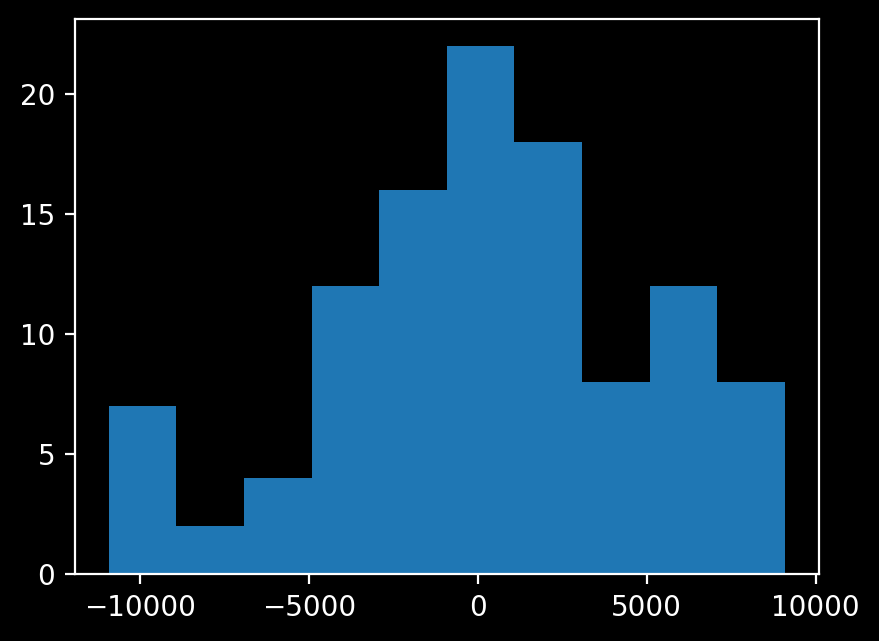

In [9]:
plt.hist(fit_ols.resid)

In [10]:
model_gls = sm.GLS(Y, X)
fit_gls = model_gls.fit()
print(fit_gls.summary())

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            GLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.480e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                   2.92e-143
Time:                        18:10:45   Log-Likelihood:                         -1077.2
No. Observations:                 109   AIC:                                      2156.
Df Residuals:                     108   BIC:                                      2159.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------